# K-Nearest Neighbors (KNN) – Quick Theory Reference

## 📌 What is KNN?
- **Supervised** learning algorithm (classification & regression)
- **Lazy learner**: No explicit training; stores all training data
- **Instance-based** & **non-parametric** (no assumptions about data distribution)

## ⚙️ How It Works
1. Choose **k** (number of neighbors)
2. Compute **distance** to every training point
3. Select **k closest** points
4. **Aggregate** their labels:
   - Classification → majority vote
   - Regression → average (or weighted average)

## 🔢 Key Hyperparameters
- **k** (number of neighbors)
- **Distance metric** (Euclidean, Manhattan, Minkowski, Hamming, Cosine)
- **Weighting** (uniform or distance-based)

## 📏 Distance Metrics (Common)
| Metric     | Use Case                      |
|------------|-------------------------------|
| Euclidean  | Continuous, default           |
| Manhattan  | High‑dim, robust to outliers |
| Minkowski  | Generalization (p=1 or 2)    |
| Hamming    | Categorical / binary data     |
| Cosine     | Text / sparse data            |

## ⚖️ Bias‑Variance Tradeoff (Choice of k)
- **Small k** → low bias, high variance (overfit)
- **Large k** → high bias, low variance (underfit)
- Find optimal k via **cross‑validation**
- Use odd k for binary classification to avoid ties

## 📉 Curse of Dimensionality
- Performance degrades as #features increases → distances become less meaningful
- Mitigate with **feature selection** or **dimensionality reduction** (PCA)

## ✅ Pros
- Simple, intuitive
- No training phase
- Non‑parametric → flexible boundaries
- Naturally handles multi‑class

## ❌ Cons
- Slow prediction (O(N·d))
- Memory intensive
- Sensitive to irrelevant features & noise
- Requires **feature scaling** (essential!)
- Suffers in high dimensions

## 📊 Evaluation Metrics
- **Classification**: Accuracy, Precision, Recall, F1, ROC‑AUC
- **Regression**: MSE, MAE, R²
- Use **cross‑validation** for tuning

## 📝 Summary
- Always **scale** features
- Tune **k** with validation
- Choose distance metric wisely
- Beware of **high dimensionality**

## import libraries and load dataset

In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load data
cancer = load_breast_cancer()
X = cancer.data          # features
y = cancer.target        # target (0 = benign, 1 = malignant)

print("Feature shape:", X.shape)
print("Target distribution:")
print(pd.Series(y).value_counts())
print("0 = benign, 1 = malignant")


Feature shape: (569, 30)
Target distribution:
1    357
0    212
Name: count, dtype: int64
0 = benign, 1 = malignant


## 2. Split into Train and Test Sets
We'll use 70% for training, 30% for testing.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 3. Standardize Features
KNN uses distances, so features should be on the same scale. We standardize (mean=0, variance=1).

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Train KNN Classifier
We'll start with k = 5 (5 nearest neighbors).

In [33]:
k_values = [3, 5, 7, 9, 11]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    recall = recall_score(y_test, y_pred, pos_label=1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    print(f"k={k}: Precision={precision:.3f}, Recall={recall:.3f}")

k=3: Precision=0.935, Recall=0.935
k=5: Precision=0.935, Recall=0.944
k=7: Precision=0.928, Recall=0.963
k=9: Precision=0.937, Recall=0.972
k=11: Precision=0.920, Recall=0.963


## 5. Confusion Matrix and Metrics
Let's see how well our model performed.

Confusion Matrix:
[[ 55   9]
 [  4 103]]


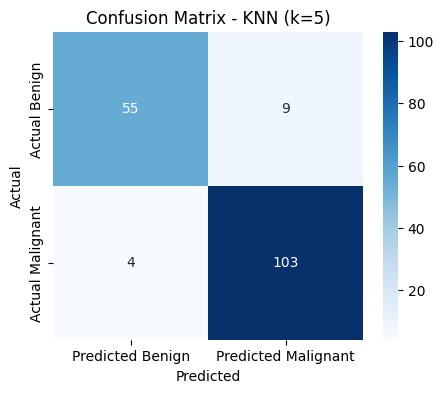

In [34]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN (k=5)')
plt.show()

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)   # malignant is positive
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Accuracy:  0.9240
Precision: 0.9196
Recall:    0.9626
F1-Score:  0.9406


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
df = pd.DataFrame(X,columns= cancer.feature_names)
df["target"] = y
df['target'].value_counts()



target
1    357
0    212
Name: count, dtype: int64

In [3]:
# split the data for training process 
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size=0.3)

In [4]:
# scale the data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
# trian the model using knn 

train_acc = []
test_acc = []
k_list = range(1, 21)

for k in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    
    train_acc.append(accuracy_score(y_train, knn_model.predict(x_train)))
    test_acc.append(accuracy_score(y_test, knn_model.predict(x_test)))
    
    print(f"Training accuracy for k={k}: {train_acc[-1]:.4f}")
    print(f"Test accuracy for k={k}: {test_acc[-1]:.4f}")
    print("-" * 40)

# Optional: After the loop, you can view all accuracies
print("\nSummary of all accuracies:")
for k, train, test in zip(k_list, train_acc, test_acc):
    print(f"k={k:2d} - Train: {train:.4f}, Test: {test:.4f}")
   
    


Training accuracy for k=1: 1.0000
Test accuracy for k=1: 0.9474
----------------------------------------
Training accuracy for k=2: 0.9824
Test accuracy for k=2: 0.9415
----------------------------------------
Training accuracy for k=3: 0.9799
Test accuracy for k=3: 0.9532
----------------------------------------
Training accuracy for k=4: 0.9874
Test accuracy for k=4: 0.9532
----------------------------------------
Training accuracy for k=5: 0.9774
Test accuracy for k=5: 0.9474
----------------------------------------
Training accuracy for k=6: 0.9799
Test accuracy for k=6: 0.9415
----------------------------------------
Training accuracy for k=7: 0.9799
Test accuracy for k=7: 0.9532
----------------------------------------
Training accuracy for k=8: 0.9774
Test accuracy for k=8: 0.9415
----------------------------------------
Training accuracy for k=9: 0.9749
Test accuracy for k=9: 0.9532
----------------------------------------
Training accuracy for k=10: 0.9774
Test accuracy for k=

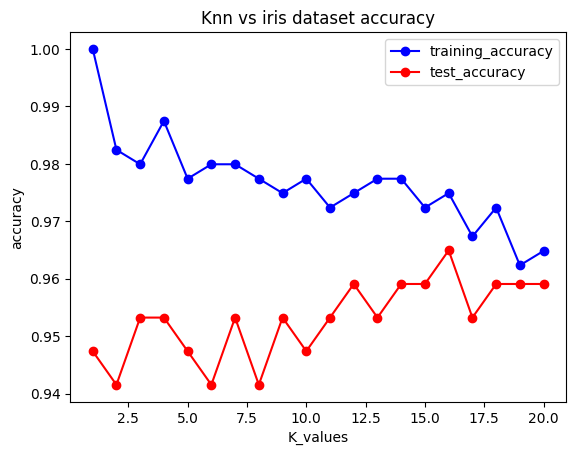

In [6]:
plt.Figure(figsize=(5,10))
plt.plot(k_list,train_acc,"b-o", label = "training_accuracy")
plt.plot(k_list,test_acc, "r-o", label = "test_accuracy")
plt.xlabel("K_values")
plt.ylabel("accuracy")
plt.title("Knn vs iris dataset accuracy")
plt.legend()
plt.show()